In [1]:
pip install -U mplsoccer

In [4]:
import pandas as pd
import numpy as np
import json
# plotting
import matplotlib.pyplot as plt
# statistical fitting of models
import statsmodels.api as sm
import statsmodels.formula.api as smf
#opening data
import os
import pathlib
import warnings
#used for plots
from scipy import stats
from mplsoccer import PyPizza, FontManager

pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')

In [5]:
players = pd.read_csv('Botola players.csv')
players['Goals per 90'] = (players['Goals'] * 90)/(players['Minutes per game'] * players['Total Played'])
players['Expected Goals (xG) per 90'] = (players['Expected Goals (xG)'] * 90)/(players['Minutes per game'] * players['Total Played'])
players['Key passes per 90'] = (players['Key passes'] * 90)/(players['Minutes per game'] * players['Total Played'])

In [6]:
forwards = players[players['Position'] == 'Forward']
forwards = forwards[['Player','Expected Goals (xG) per 90', 'Goals per 90', 'Shots per game', 'Accurate passes per game (in %)','Key passes per 90', 'Acc. crosses in %', 'Succ. dribbles in %', 'Total duels won in %', 'Aerial duels won in %']]

In [7]:
ennafati = forwards[forwards['Player'] == 'Adam Ennafati']
ennafati_values = ennafati[['Expected Goals (xG) per 90', 'Goals per 90', 'Shots per game', 'Accurate passes per game (in %)','Key passes per 90', 'Acc. crosses in %', 'Succ. dribbles in %', 'Total duels won in %', 'Aerial duels won in %']]
ennafati_values = ennafati_values.iloc[0].tolist()
ennafati_values = [float(val) if isinstance(val, (int, float)) or (isinstance(val, str) and val.replace('.', '', 1).isdigit()) else val for val in ennafati_values]
ennafati_values = [round(val, 2) if isinstance(val, (int, float)) else val for val in ennafati_values]
ennafati_values

ennafati_percentiles = [int(stats.percentileofscore(forwards[column], ennafati[column].iloc[0])) for column in ['Expected Goals (xG) per 90', 'Goals per 90', 'Shots per game', 'Accurate passes per game (in %)','Key passes per 90', 'Acc. crosses in %', 'Succ. dribbles in %', 'Total duels won in %', 'Aerial duels won in %']]
ennafati_percentiles

[59, 72, 63, 44, 86, 64, 56, 68, 16]

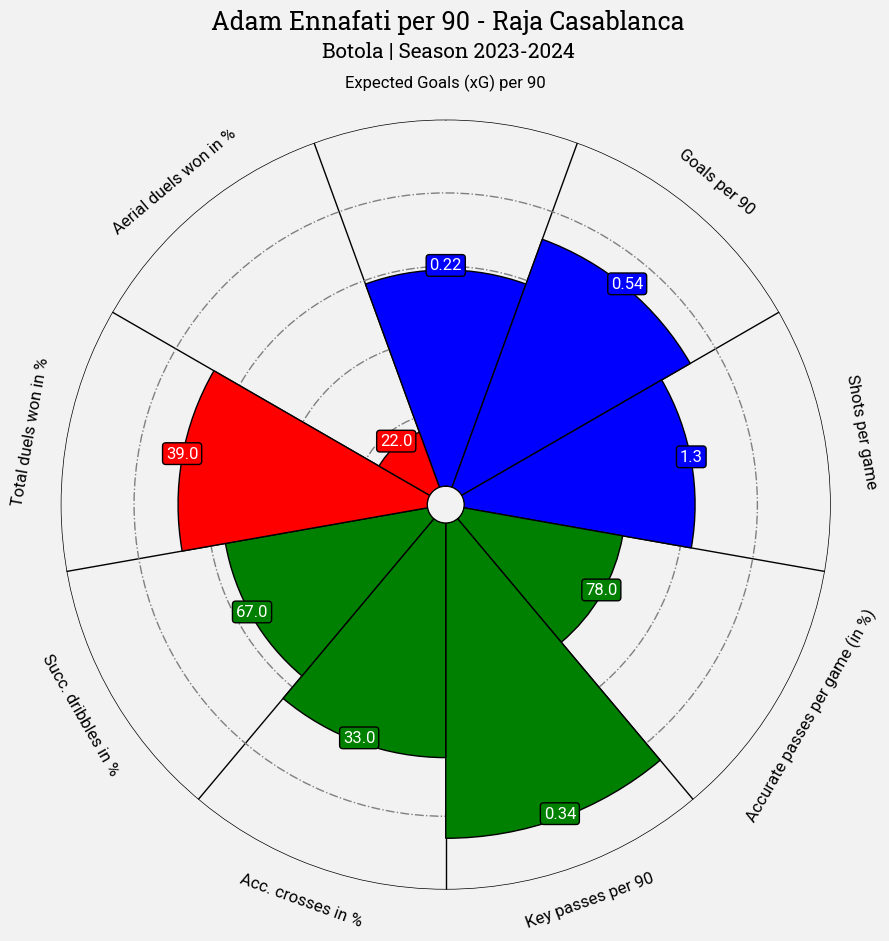

In [8]:
#list of names on plots
names = ['Expected Goals (xG) per 90', 'Goals per 90', 'Shots per game', 'Accurate passes per game (in %)','Key passes per 90', 'Acc. crosses in %', 'Succ. dribbles in %', 'Total duels won in %', 'Aerial duels won in %']
slice_colors = ["blue"] * 3 + ["green"] * 4 + ["red"] * 2
text_colors = ["white"]*9
font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/"
                           "Roboto%5Bwdth,wght%5D.ttf?raw=true"))
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/robotoslab/"
                         "RobotoSlab%5Bwght%5D.ttf?raw=true"))
#PIZZA PLOT
baker = PyPizza(
    params=names,
    min_range = None,
    max_range = None,               # list of parameters
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=1,              # linewidth for other circles
    other_circle_ls="-."            # linestyle for other circles
)
#making pizza for our data
fig, ax = baker.make_pizza(
    ennafati_percentiles,              # list of values
    figsize=(10, 10),      # adjust figsize according to your need
    param_location=110,
    slice_colors=slice_colors,
    value_colors = text_colors,
    value_bck_colors=slice_colors, # where the parameters will be added
    kwargs_slices=dict(
        facecolor="cornflowerblue", edgecolor="#000000",
        zorder=2, linewidth=1
    ),                   # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=12,
        fontproperties=font_normal.prop, va="center"
    ),                   # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                    # values to be used when adding parameter-values
)

#putting text
texts = baker.get_value_texts()
for i, text in enumerate(texts):
    text.set_text(str(ennafati_values[i]))
# add title
fig.text(
    0.515, 0.97, "Adam Ennafati per 90 - Raja Casablanca", size=18,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "Botola | Season 2023-2024",
    size=15,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)
plt.show()

In [9]:
elhouni = forwards[forwards['Player'] == 'Hamden Elhouni']
elhouni_values = elhouni[['Expected Goals (xG) per 90', 'Goals per 90', 'Shots per game', 'Accurate passes per game (in %)','Key passes per 90', 'Acc. crosses in %', 'Succ. dribbles in %', 'Total duels won in %', 'Aerial duels won in %']]
elhouni_values = elhouni_values.iloc[0].tolist()
elhouni_values = [float(val) if isinstance(val, (int, float)) or (isinstance(val, str) and val.replace('.', '', 1).isdigit()) else val for val in elhouni_values]
elhouni_values = [round(val, 2) if isinstance(val, (int, float)) else val for val in elhouni_values]
elhouni_values

elhouni_percentiles = [int(stats.percentileofscore(forwards[column], elhouni[column].iloc[0])) for column in ['Expected Goals (xG) per 90', 'Goals per 90', 'Shots per game', 'Accurate passes per game (in %)','Key passes per 90', 'Acc. crosses in %', 'Succ. dribbles in %', 'Total duels won in %', 'Aerial duels won in %']]
elhouni_percentiles

[28, 18, 63, 68, 64, 52, 45, 89, 75]

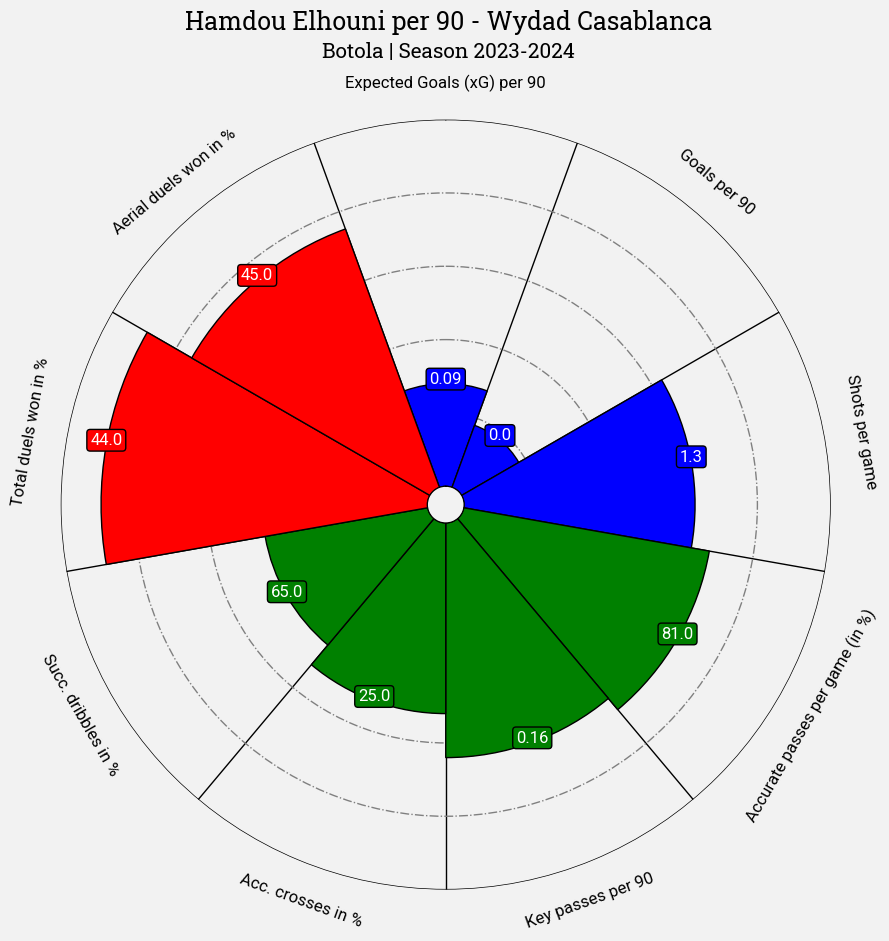

In [10]:
#list of names on plots
names = ['Expected Goals (xG) per 90', 'Goals per 90', 'Shots per game', 'Accurate passes per game (in %)','Key passes per 90', 'Acc. crosses in %', 'Succ. dribbles in %', 'Total duels won in %', 'Aerial duels won in %']
slice_colors = ["blue"] * 3 + ["green"] * 4 + ["red"] * 2
text_colors = ["white"]*9
font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/"
                           "Roboto%5Bwdth,wght%5D.ttf?raw=true"))
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/robotoslab/"
                         "RobotoSlab%5Bwght%5D.ttf?raw=true"))
#PIZZA PLOT
baker = PyPizza(
    params=names,
    min_range = None,
    max_range = None,               # list of parameters
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=1,              # linewidth for other circles
    other_circle_ls="-."            # linestyle for other circles
)
#making pizza for our data
fig, ax = baker.make_pizza(
    elhouni_percentiles,              # list of values
    figsize=(10, 10),      # adjust figsize according to your need
    param_location=110,
    slice_colors=slice_colors,
    value_colors = text_colors,
    value_bck_colors=slice_colors, # where the parameters will be added
    kwargs_slices=dict(
        facecolor="cornflowerblue", edgecolor="#000000",
        zorder=2, linewidth=1
    ),                   # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=12,
        fontproperties=font_normal.prop, va="center"
    ),                   # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                    # values to be used when adding parameter-values
)

#putting text
texts = baker.get_value_texts()
for i, text in enumerate(texts):
    text.set_text(str(elhouni_values[i]))
# add title
fig.text(
    0.515, 0.97, "Hamdou Elhouni per 90 - Wydad Casablanca", size=18,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "Botola | Season 2023-2024",
    size=15,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)
plt.show()

In [11]:
elmorabit = forwards[forwards['Player'] == 'Mohamed El Morabit']
elmorabit_values = elmorabit[['Expected Goals (xG) per 90', 'Goals per 90', 'Shots per game', 'Accurate passes per game (in %)','Key passes per 90', 'Acc. crosses in %', 'Succ. dribbles in %', 'Total duels won in %', 'Aerial duels won in %']]
elmorabit_values = elmorabit_values.iloc[0].tolist()
elmorabit_values = [float(val) if isinstance(val, (int, float)) or (isinstance(val, str) and val.replace('.', '', 1).isdigit()) else val for val in elmorabit_values]
elmorabit_values = [round(val, 2) if isinstance(val, (int, float)) else val for val in elmorabit_values]
elmorabit_values

elmorabit_percentiles = [int(stats.percentileofscore(forwards[column], elmorabit[column].iloc[0])) for column in ['Expected Goals (xG) per 90', 'Goals per 90', 'Shots per game', 'Accurate passes per game (in %)','Key passes per 90', 'Acc. crosses in %', 'Succ. dribbles in %', 'Total duels won in %', 'Aerial duels won in %']]
elmorabit_percentiles

[54, 41, 71, 40, 83, 37, 72, 43, 54]

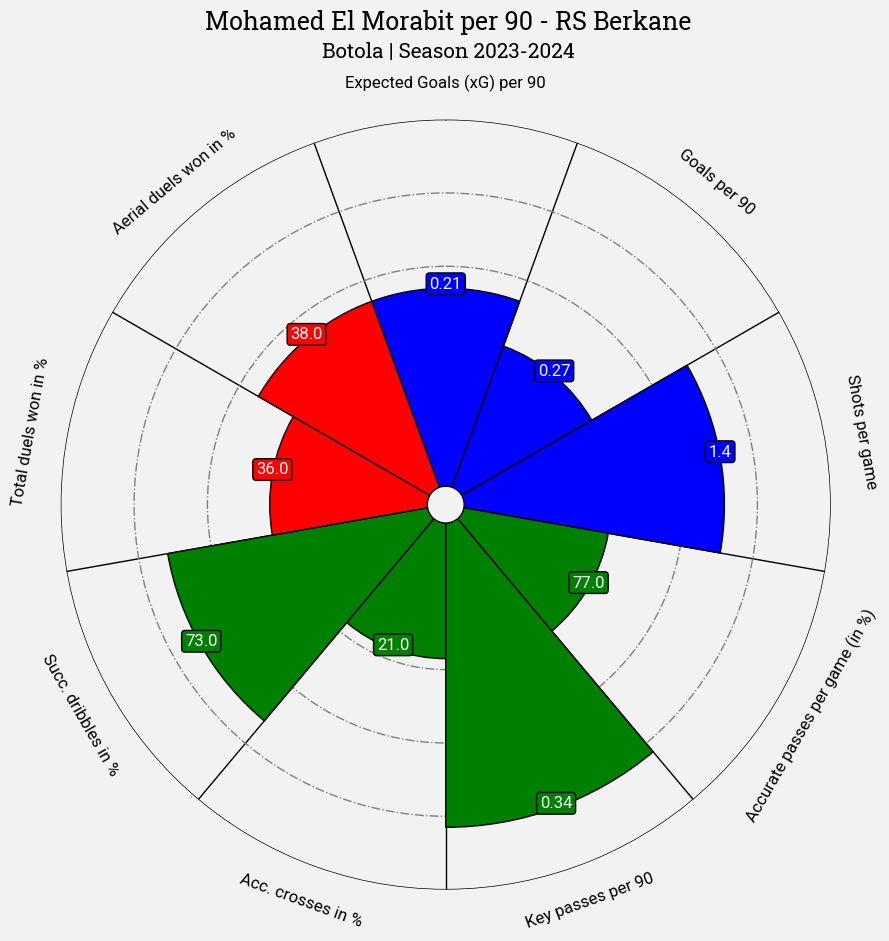

In [12]:
names = ['Expected Goals (xG) per 90', 'Goals per 90', 'Shots per game', 'Accurate passes per game (in %)','Key passes per 90', 'Acc. crosses in %', 'Succ. dribbles in %', 'Total duels won in %', 'Aerial duels won in %']
slice_colors = ["blue"] * 3 + ["green"] * 4 + ["red"] * 2
text_colors = ["white"]*9
font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/"
                           "Roboto%5Bwdth,wght%5D.ttf?raw=true"))
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/robotoslab/"
                         "RobotoSlab%5Bwght%5D.ttf?raw=true"))
#PIZZA PLOT
baker = PyPizza(
    params=names,
    min_range = None,
    max_range = None,               # list of parameters
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=1,              # linewidth for other circles
    other_circle_ls="-."            # linestyle for other circles
)
#making pizza for our data
fig, ax = baker.make_pizza(
    elmorabit_percentiles,              # list of values
    figsize=(10, 10),      # adjust figsize according to your need
    param_location=110,
    slice_colors=slice_colors,
    value_colors = text_colors,
    value_bck_colors=slice_colors, # where the parameters will be added
    kwargs_slices=dict(
        facecolor="cornflowerblue", edgecolor="#000000",
        zorder=2, linewidth=1
    ),                   # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=12,
        fontproperties=font_normal.prop, va="center"
    ),                   # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                    # values to be used when adding parameter-values
)

#putting text
texts = baker.get_value_texts()
for i, text in enumerate(texts):
    text.set_text(str(elmorabit_values[i]))
# add title
fig.text(
    0.515, 0.97, "Mohamed El Morabit per 90 - RS Berkane", size=18,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "Botola | Season 2023-2024",
    size=15,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)
plt.show()

In [13]:
agoro = forwards[forwards['Player'] == 'Ismail ouro-Agoro']
agoro_values = agoro[['Expected Goals (xG) per 90', 'Goals per 90', 'Shots per game', 'Accurate passes per game (in %)','Key passes per 90', 'Acc. crosses in %', 'Succ. dribbles in %', 'Total duels won in %', 'Aerial duels won in %']]
agoro_values = agoro_values.iloc[0].tolist()
agoro_values = [float(val) if isinstance(val, (int, float)) or (isinstance(val, str) and val.replace('.', '', 1).isdigit()) else val for val in agoro_values]
agoro_values = [round(val, 2) if isinstance(val, (int, float)) else val for val in agoro_values]
agoro_values

agoro_percentiles = [int(stats.percentileofscore(forwards[column], agoro[column].iloc[0])) for column in ['Expected Goals (xG) per 90', 'Goals per 90', 'Shots per game', 'Accurate passes per game (in %)','Key passes per 90', 'Acc. crosses in %', 'Succ. dribbles in %', 'Total duels won in %', 'Aerial duels won in %']]
agoro_percentiles

[97, 91, 87, 51, 10, 83, 56, 17, 54]

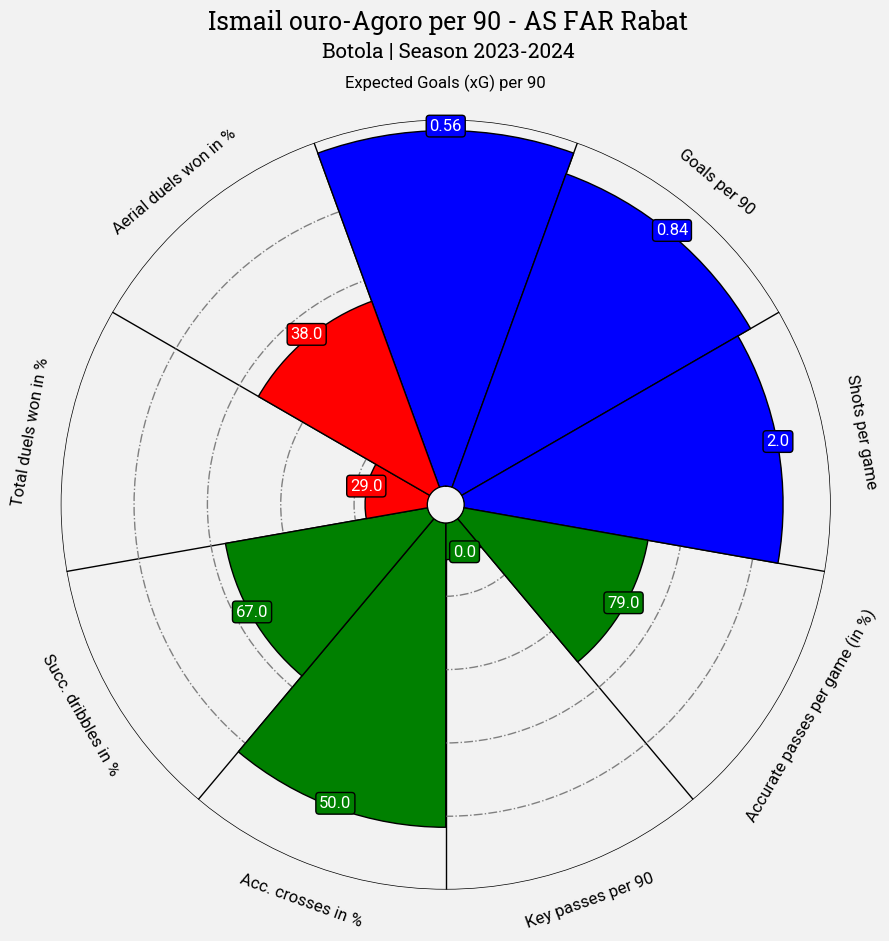

In [14]:
names = ['Expected Goals (xG) per 90', 'Goals per 90', 'Shots per game', 'Accurate passes per game (in %)','Key passes per 90', 'Acc. crosses in %', 'Succ. dribbles in %', 'Total duels won in %', 'Aerial duels won in %']
slice_colors = ["blue"] * 3 + ["green"] * 4 + ["red"] * 2
text_colors = ["white"]*9
font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/"
                           "Roboto%5Bwdth,wght%5D.ttf?raw=true"))
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/robotoslab/"
                         "RobotoSlab%5Bwght%5D.ttf?raw=true"))
#PIZZA PLOT
baker = PyPizza(
    params=names,
    min_range = None,
    max_range = None,               # list of parameters
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=1,              # linewidth for other circles
    other_circle_ls="-."            # linestyle for other circles
)
#making pizza for our data
fig, ax = baker.make_pizza(
    agoro_percentiles,              # list of values
    figsize=(10, 10),      # adjust figsize according to your need
    param_location=110,
    slice_colors=slice_colors,
    value_colors = text_colors,
    value_bck_colors=slice_colors, # where the parameters will be added
    kwargs_slices=dict(
        facecolor="cornflowerblue", edgecolor="#000000",
        zorder=2, linewidth=1
    ),                   # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=12,
        fontproperties=font_normal.prop, va="center"
    ),                   # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                    # values to be used when adding parameter-values
)

#putting text
texts = baker.get_value_texts()
for i, text in enumerate(texts):
    text.set_text(str(agoro_values[i]))
# add title
fig.text(
    0.515, 0.97, "Ismail ouro-Agoro per 90 - AS FAR Rabat", size=18,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "Botola | Season 2023-2024",
    size=15,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)
plt.show()

In [15]:
lamlioui = forwards[forwards['Player'] == 'Oussama Lamlioui']
lamlioui_values = lamlioui[['Expected Goals (xG) per 90', 'Goals per 90', 'Shots per game', 'Accurate passes per game (in %)','Key passes per 90', 'Acc. crosses in %', 'Succ. dribbles in %', 'Total duels won in %', 'Aerial duels won in %']]
lamlioui_values = lamlioui_values.iloc[0].tolist()
lamlioui_values = [float(val) if isinstance(val, (int, float)) or (isinstance(val, str) and val.replace('.', '', 1).isdigit()) else val for val in lamlioui_values]
lamlioui_values = [round(val, 2) if isinstance(val, (int, float)) else val for val in lamlioui_values]
lamlioui_values

lamlioui_percentiles = [int(stats.percentileofscore(forwards[column], lamlioui[column].iloc[0])) for column in ['Expected Goals (xG) per 90', 'Goals per 90', 'Shots per game', 'Accurate passes per game (in %)','Key passes per 90', 'Acc. crosses in %', 'Succ. dribbles in %', 'Total duels won in %', 'Aerial duels won in %']]
lamlioui_percentiles

[91, 56, 75, 90, 21, 97, 56, 52, 47]

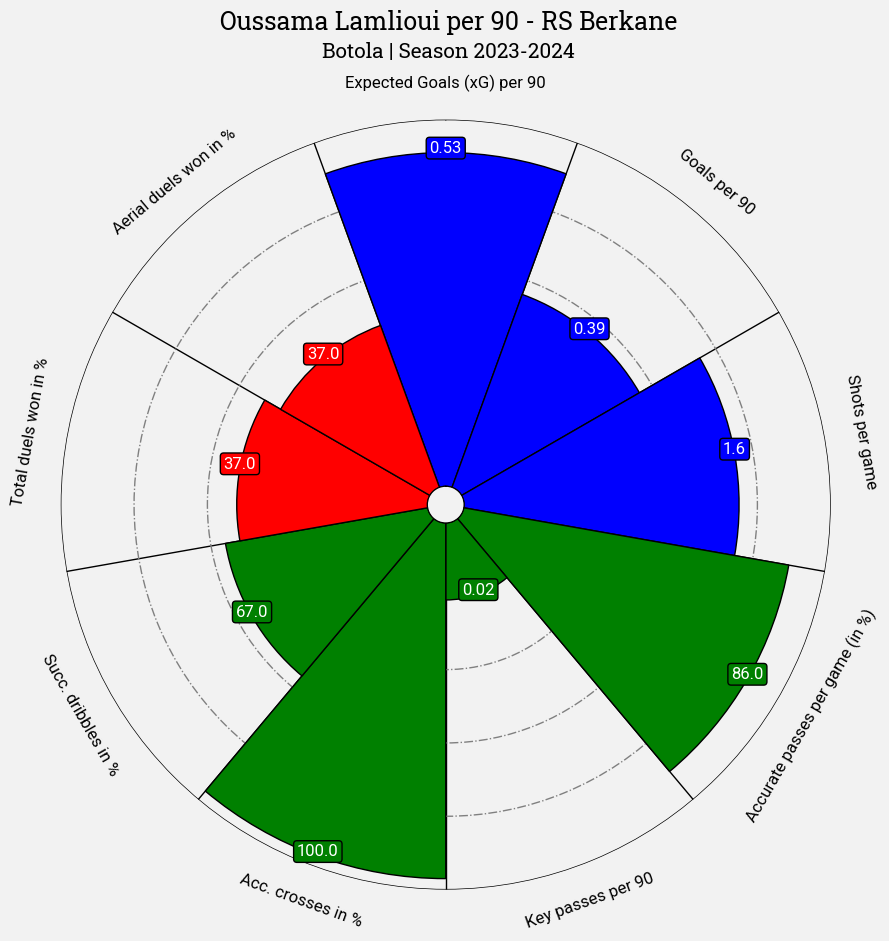

In [16]:
names = ['Expected Goals (xG) per 90', 'Goals per 90', 'Shots per game', 'Accurate passes per game (in %)','Key passes per 90', 'Acc. crosses in %', 'Succ. dribbles in %', 'Total duels won in %', 'Aerial duels won in %']
slice_colors = ["blue"] * 3 + ["green"] * 4 + ["red"] * 2
text_colors = ["white"]*9
font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/"
                           "Roboto%5Bwdth,wght%5D.ttf?raw=true"))
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/robotoslab/"
                         "RobotoSlab%5Bwght%5D.ttf?raw=true"))
#PIZZA PLOT
baker = PyPizza(
    params=names,
    min_range = None,
    max_range = None,               # list of parameters
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=1,              # linewidth for other circles
    other_circle_ls="-."            # linestyle for other circles
)
#making pizza for our data
fig, ax = baker.make_pizza(
    lamlioui_percentiles,              # list of values
    figsize=(10, 10),      # adjust figsize according to your need
    param_location=110,
    slice_colors=slice_colors,
    value_colors = text_colors,
    value_bck_colors=slice_colors, # where the parameters will be added
    kwargs_slices=dict(
        facecolor="cornflowerblue", edgecolor="#000000",
        zorder=2, linewidth=1
    ),                   # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=12,
        fontproperties=font_normal.prop, va="center"
    ),                   # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                    # values to be used when adding parameter-values
)

#putting text
texts = baker.get_value_texts()
for i, text in enumerate(texts):
    text.set_text(str(lamlioui_values[i]))
# add title
fig.text(
    0.515, 0.97, "Oussama Lamlioui per 90 - RS Berkane", size=18,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "Botola | Season 2023-2024",
    size=15,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)
plt.show()

In [17]:
mehri = forwards[forwards['Player'] == 'Youssef Mehri']
mehri_values = mehri[['Expected Goals (xG) per 90', 'Goals per 90', 'Shots per game', 'Accurate passes per game (in %)','Key passes per 90', 'Acc. crosses in %', 'Succ. dribbles in %', 'Total duels won in %', 'Aerial duels won in %']]
mehri_values = mehri_values.iloc[0].tolist()
mehri_values = [float(val) if isinstance(val, (int, float)) or (isinstance(val, str) and val.replace('.', '', 1).isdigit()) else val for val in mehri_values]
mehri_values = [round(val, 2) if isinstance(val, (int, float)) else val for val in mehri_values]
mehri_values

mehri_percentiles = [int(stats.percentileofscore(forwards[column], mehri[column].iloc[0])) for column in ['Expected Goals (xG) per 90', 'Goals per 90', 'Shots per game', 'Accurate passes per game (in %)','Key passes per 90', 'Acc. crosses in %', 'Succ. dribbles in %', 'Total duels won in %', 'Aerial duels won in %']]
mehri_percentiles

[56, 45, 27, 51, 70, 72, 70, 62, 64]

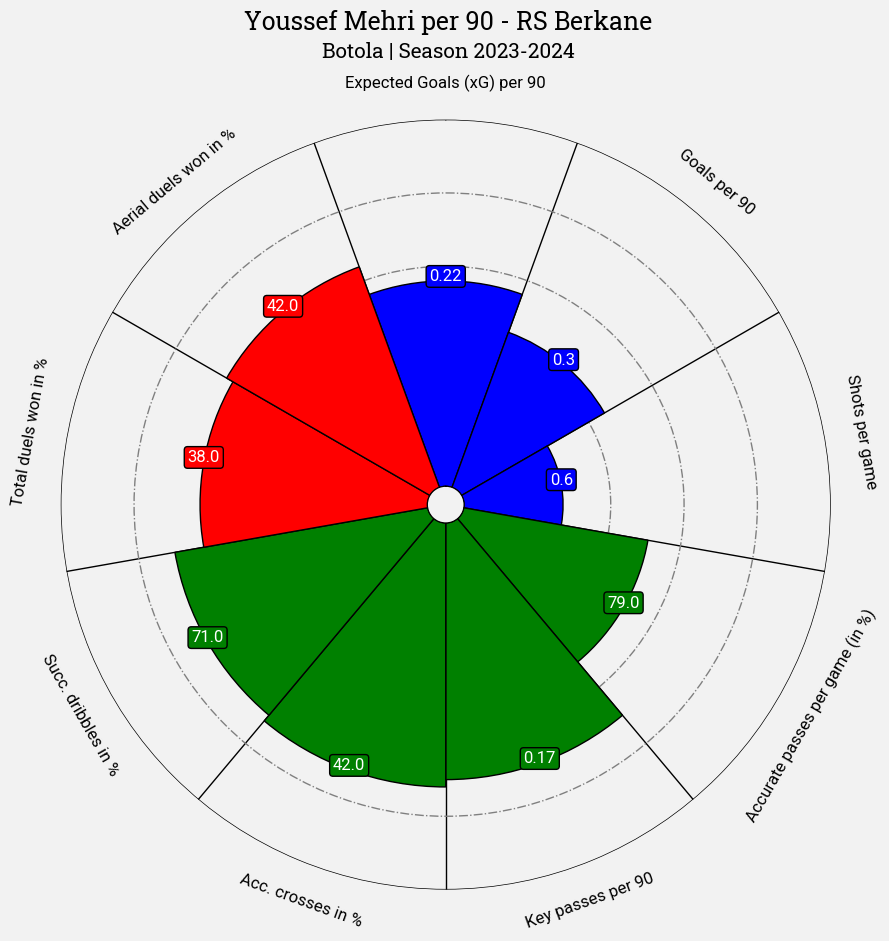

In [18]:
names = ['Expected Goals (xG) per 90', 'Goals per 90', 'Shots per game', 'Accurate passes per game (in %)','Key passes per 90', 'Acc. crosses in %', 'Succ. dribbles in %', 'Total duels won in %', 'Aerial duels won in %']
slice_colors = ["blue"] * 3 + ["green"] * 4 + ["red"] * 2
text_colors = ["white"]*9
font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/"
                           "Roboto%5Bwdth,wght%5D.ttf?raw=true"))
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/robotoslab/"
                         "RobotoSlab%5Bwght%5D.ttf?raw=true"))
#PIZZA PLOT
baker = PyPizza(
    params=names,
    min_range = None,
    max_range = None,               # list of parameters
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=1,              # linewidth for other circles
    other_circle_ls="-."            # linestyle for other circles
)
#making pizza for our data
fig, ax = baker.make_pizza(
    mehri_percentiles,              # list of values
    figsize=(10, 10),      # adjust figsize according to your need
    param_location=110,
    slice_colors=slice_colors,
    value_colors = text_colors,
    value_bck_colors=slice_colors, # where the parameters will be added
    kwargs_slices=dict(
        facecolor="cornflowerblue", edgecolor="#000000",
        zorder=2, linewidth=1
    ),                   # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=12,
        fontproperties=font_normal.prop, va="center"
    ),                   # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                    # values to be used when adding parameter-values
)

#putting text
texts = baker.get_value_texts()
for i, text in enumerate(texts):
    text.set_text(str(mehri_values[i]))
# add title
fig.text(
    0.515, 0.97, "Youssef Mehri per 90 - RS Berkane", size=18,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "Botola | Season 2023-2024",
    size=15,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)
plt.show()

In [19]:
igamane = forwards[forwards['Player'] == 'Hamza Igamane']
igamane_values = igamane[['Expected Goals (xG) per 90', 'Goals per 90', 'Shots per game', 'Accurate passes per game (in %)','Key passes per 90', 'Acc. crosses in %', 'Succ. dribbles in %', 'Total duels won in %', 'Aerial duels won in %']]
igamane_values = igamane_values.iloc[0].tolist()
igamane_values = [float(val) if isinstance(val, (int, float)) or (isinstance(val, str) and val.replace('.', '', 1).isdigit()) else val for val in igamane_values]
igamane_values = [round(val, 2) if isinstance(val, (int, float)) else val for val in igamane_values]
igamane_values

igamane_percentiles = [int(stats.percentileofscore(forwards[column], igamane[column].iloc[0])) for column in ['Expected Goals (xG) per 90', 'Goals per 90', 'Shots per game', 'Accurate passes per game (in %)','Key passes per 90', 'Acc. crosses in %', 'Succ. dribbles in %', 'Total duels won in %', 'Aerial duels won in %']]
igamane_percentiles

[75, 75, 78, 8, 89, 97, 94, 85, 91]

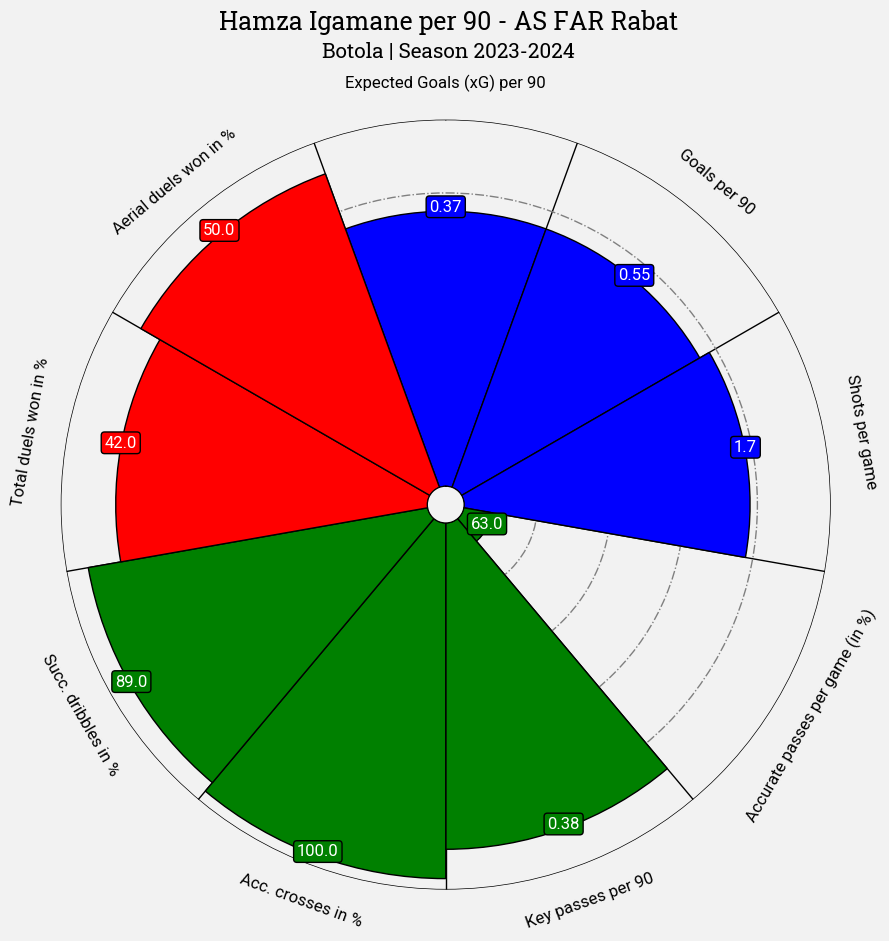

In [20]:
names = ['Expected Goals (xG) per 90', 'Goals per 90', 'Shots per game', 'Accurate passes per game (in %)','Key passes per 90', 'Acc. crosses in %', 'Succ. dribbles in %', 'Total duels won in %', 'Aerial duels won in %']
slice_colors = ["blue"] * 3 + ["green"] * 4 + ["red"] * 2
text_colors = ["white"]*9
font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/"
                           "Roboto%5Bwdth,wght%5D.ttf?raw=true"))
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/robotoslab/"
                         "RobotoSlab%5Bwght%5D.ttf?raw=true"))
#PIZZA PLOT
baker = PyPizza(
    params=names,
    min_range = None,
    max_range = None,               # list of parameters
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=1,              # linewidth for other circles
    other_circle_ls="-."            # linestyle for other circles
)
#making pizza for our data
fig, ax = baker.make_pizza(
    igamane_percentiles,              # list of values
    figsize=(10, 10),      # adjust figsize according to your need
    param_location=110,
    slice_colors=slice_colors,
    value_colors = text_colors,
    value_bck_colors=slice_colors, # where the parameters will be added
    kwargs_slices=dict(
        facecolor="cornflowerblue", edgecolor="#000000",
        zorder=2, linewidth=1
    ),                   # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=12,
        fontproperties=font_normal.prop, va="center"
    ),                   # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                    # values to be used when adding parameter-values
)

#putting text
texts = baker.get_value_texts()
for i, text in enumerate(texts):
    text.set_text(str(igamane_values[i]))
# add title
fig.text(
    0.515, 0.97, "Hamza Igamane per 90 - AS FAR Rabat", size=18,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "Botola | Season 2023-2024",
    sizes=15,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)
plt.show()

In [21]:
bahri = forwards[forwards['Player'] == 'Charki El Bahri']
bahri_values = bahri[['Expected Goals (xG) per 90', 'Goals per 90', 'Shots per game', 'Accurate passes per game (in %)','Key passes per 90', 'Acc. crosses in %', 'Succ. dribbles in %', 'Total duels won in %', 'Aerial duels won in %']]
bahri_values = bahri_values.iloc[0].tolist()
bahri_values = [float(val) if isinstance(val, (int, float)) or (isinstance(val, str) and val.replace('.', '', 1).isdigit()) else val for val in bahri_values]
bahri_values = [round(val, 2) if isinstance(val, (int, float)) else val for val in bahri_values]
bahri_values

bahri_percentiles = [int(stats.percentileofscore(forwards[column], bahri[column].iloc[0])) for column in ['Expected Goals (xG) per 90', 'Goals per 90', 'Shots per game', 'Accurate passes per game (in %)','Key passes per 90', 'Acc. crosses in %', 'Succ. dribbles in %', 'Total duels won in %', 'Aerial duels won in %']]
bahri_percentiles

[86, 97, 31, 82, 35, 16, 6, 62, 83]

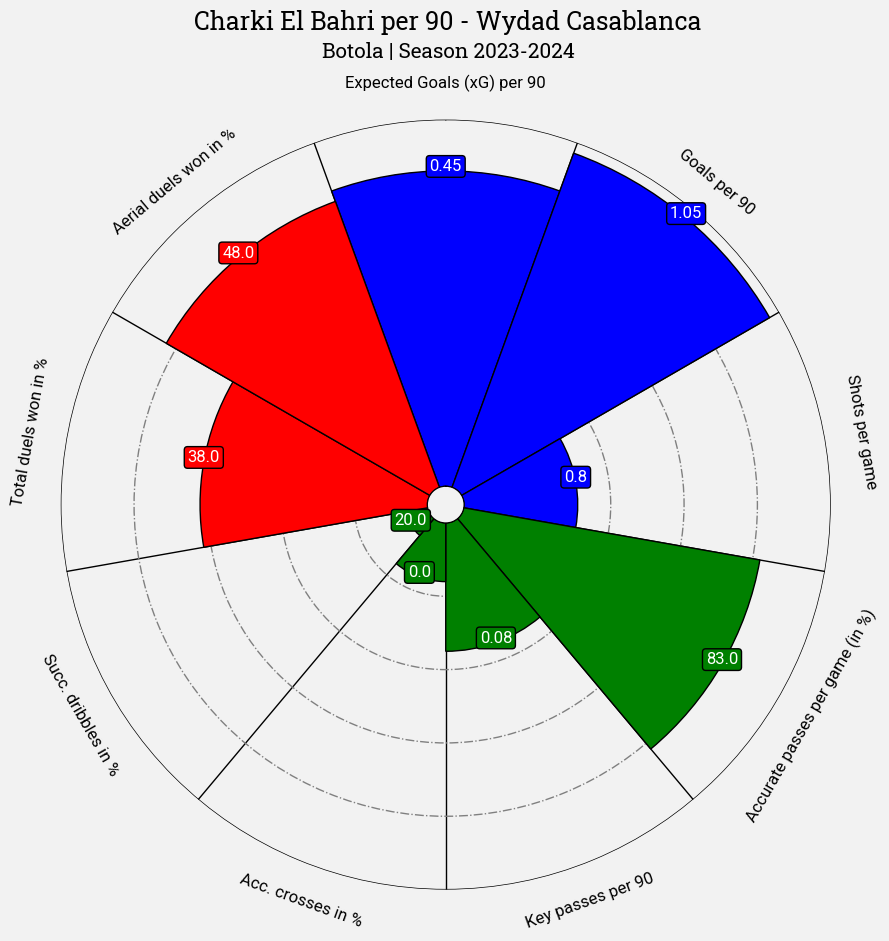

In [22]:
names = ['Expected Goals (xG) per 90', 'Goals per 90', 'Shots per game', 'Accurate passes per game (in %)','Key passes per 90', 'Acc. crosses in %', 'Succ. dribbles in %', 'Total duels won in %', 'Aerial duels won in %']
slice_colors = ["blue"] * 3 + ["green"] * 4 + ["red"] * 2
text_colors = ["white"]*9
font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/"
                           "Roboto%5Bwdth,wght%5D.ttf?raw=true"))
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/robotoslab/"
                         "RobotoSlab%5Bwght%5D.ttf?raw=true"))
#PIZZA PLOT
baker = PyPizza(
    params=names,
    min_range = None,
    max_range = None,               # list of parameters
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=1,              # linewidth for other circles
    other_circle_ls="-."            # linestyle for other circles
)
#making pizza for our data
fig, ax = baker.make_pizza(
    bahri_percentiles,              # list of values
    figsize=(10, 10),      # adjust figsize according to your need
    param_location=110,
    slice_colors=slice_colors,
    value_colors = text_colors,
    value_bck_colors=slice_colors, # where the parameters will be added
    kwargs_slices=dict(
        facecolor="cornflowerblue", edgecolor="#000000",
        zorder=2, linewidth=1
    ),                   # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=12,
        fontproperties=font_normal.prop, va="center"
    ),                   # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                    # values to be used when adding parameter-values
)

#putting text
texts = baker.get_value_texts()
for i, text in enumerate(texts):
    text.set_text(str(bahri_values[i]))
# add title
fig.text(
    0.515, 0.97, "Charki El Bahri per 90 - Wydad Casablanca", size=18,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "Botola | Season 2023-2024",
    size=15,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)
plt.show()

In [23]:
sambou = forwards[forwards['Player'] == 'Bouly Junior Sambou']
sambou_values = sambou[['Expected Goals (xG) per 90', 'Goals per 90', 'Shots per game', 'Accurate passes per game (in %)','Key passes per 90', 'Acc. crosses in %', 'Succ. dribbles in %', 'Total duels won in %', 'Aerial duels won in %']]
sambou_values = sambou_values.iloc[0].tolist()
sambou_values = [float(val) if isinstance(val, (int, float)) or (isinstance(val, str) and val.replace('.', '', 1).isdigit()) else val for val in sambou_values]
sambou_values = [round(val, 2) if isinstance(val, (int, float)) else val for val in sambou_values]
sambou_values

sambou_percentiles = [int(stats.percentileofscore(forwards[column], sambou[column].iloc[0])) for column in ['Expected Goals (xG) per 90', 'Goals per 90', 'Shots per game', 'Accurate passes per game (in %)','Key passes per 90', 'Acc. crosses in %', 'Succ. dribbles in %', 'Total duels won in %', 'Aerial duels won in %']]
sambou_percentiles

[70, 89, 87, 75, 51, 16, 98, 5, 39]

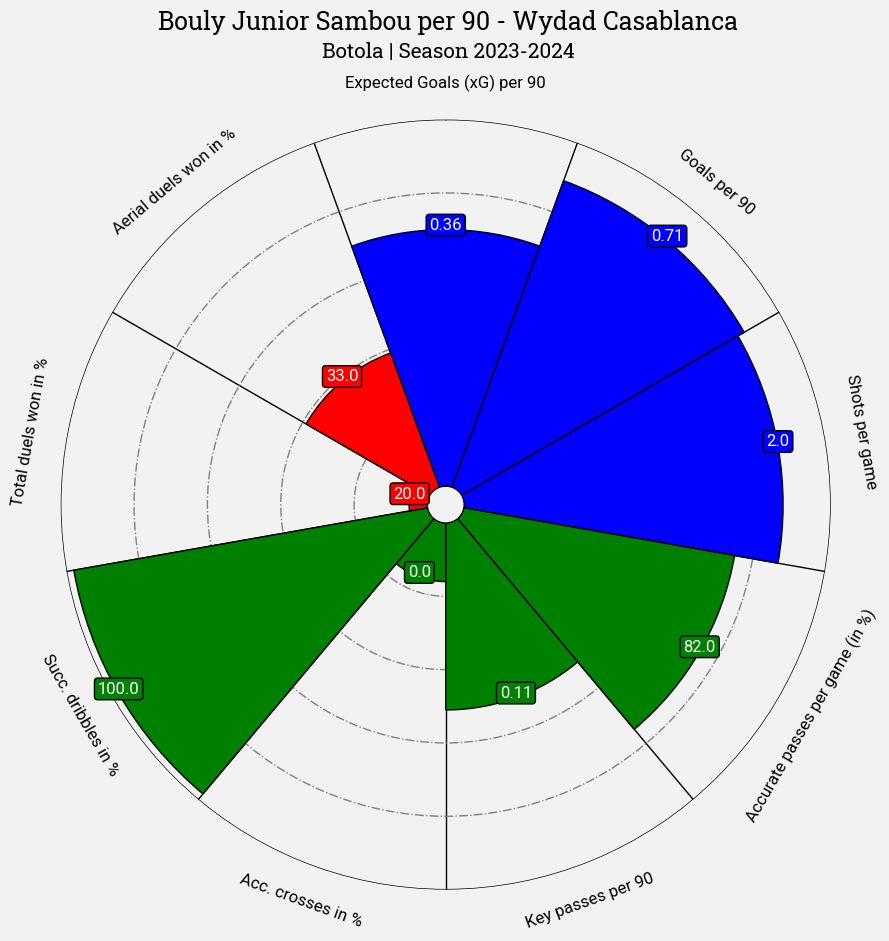

In [26]:
names = ['Expected Goals (xG) per 90', 'Goals per 90', 'Shots per game', 'Accurate passes per game (in %)','Key passes per 90', 'Acc. crosses in %', 'Succ. dribbles in %', 'Total duels won in %', 'Aerial duels won in %']
slice_colors = ["blue"] * 3 + ["green"] * 4 + ["red"] * 2
text_colors = ["white"]*9
font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/"
                           "Roboto%5Bwdth,wght%5D.ttf?raw=true"))
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/robotoslab/"
                         "RobotoSlab%5Bwght%5D.ttf?raw=true"))
#PIZZA PLOT
baker = PyPizza(
    params=names,
    min_range = None,
    max_range = None,               # list of parameters
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=1,              # linewidth for other circles
    other_circle_ls="-."            # linestyle for other circles
)
#making pizza for our data
fig, ax = baker.make_pizza(
    sambou_percentiles,              # list of values
    figsize=(10, 10),      # adjust figsize according to your need
    param_location=110,
    slice_colors=slice_colors,
    value_colors = text_colors,
    value_bck_colors=slice_colors, # where the parameters will be added
    kwargs_slices=dict(
        facecolor="cornflowerblue", edgecolor="#000000",
        zorder=2, linewidth=1
    ),                   # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=12,
        fontproperties=font_normal.prop, va="center"
    ),                   # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                    # values to be used when adding parameter-values
)

#putting text
texts = baker.get_value_texts()
for i, text in enumerate(texts):
    text.set_text(str(sambou_values[i]))
# add title
fig.text(
    0.515, 0.97, "Bouly Junior Sambou per 90 - Wydad Casablanca", size=18,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "Botola | Season 2023-2024",
    size=15,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)
plt.show()

In [25]:
diedhou = forwards[forwards['Player'] == 'Simon Diedhiou']
diedhou_values = diedhou[['Expected Goals (xG) per 90', 'Goals per 90', 'Shots per game', 'Accurate passes per game (in %)','Key passes per 90', 'Acc. crosses in %', 'Succ. dribbles in %', 'Total duels won in %', 'Aerial duels won in %']]
diedhou_values = diedhou_values.iloc[0].tolist()
diedhou_values = [float(val) if isinstance(val, (int, float)) or (isinstance(val, str) and val.replace('.', '', 1).isdigit()) else val for val in diedhou_values]
diedhou_values = [round(val, 2) if isinstance(val, (int, float)) else val for val in diedhou_values]
diedhou_values

diedhou_percentiles = [int(stats.percentileofscore(forwards[column], diedhou[column].iloc[0])) for column in ['Expected Goals (xG) per 90', 'Goals per 90', 'Shots per game', 'Accurate passes per game (in %)','Key passes per 90', 'Acc. crosses in %', 'Succ. dribbles in %', 'Total duels won in %', 'Aerial duels won in %']]
diedhou_percentiles

[62, 54, 97, 60, 29, 16, 16, 29, 24]

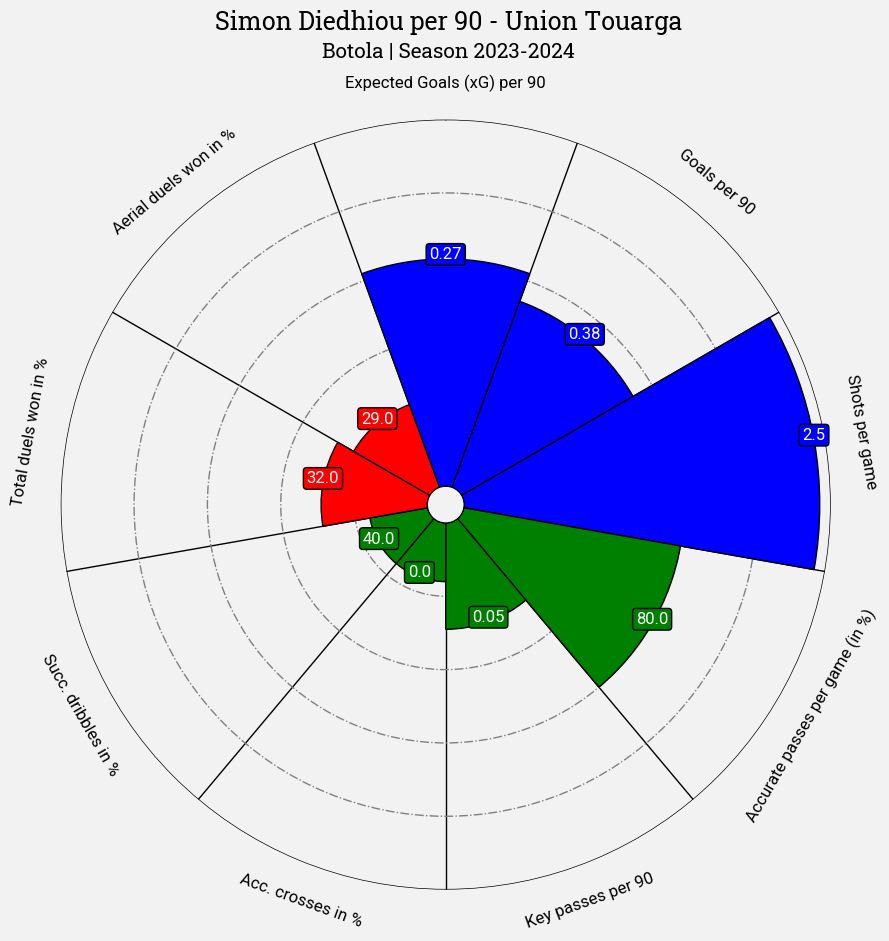

In [27]:
names = ['Expected Goals (xG) per 90', 'Goals per 90', 'Shots per game', 'Accurate passes per game (in %)','Key passes per 90', 'Acc. crosses in %', 'Succ. dribbles in %', 'Total duels won in %', 'Aerial duels won in %']
slice_colors = ["blue"] * 3 + ["green"] * 4 + ["red"] * 2
text_colors = ["white"]*9
font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/"
                           "Roboto%5Bwdth,wght%5D.ttf?raw=true"))
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/robotoslab/"
                         "RobotoSlab%5Bwght%5D.ttf?raw=true"))
#PIZZA PLOT
baker = PyPizza(
    params=names,
    min_range = None,
    max_range = None,               # list of parameters
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=1,              # linewidth for other circles
    other_circle_ls="-."            # linestyle for other circles
)
#making pizza for our data
fig, ax = baker.make_pizza(
    diedhou_percentiles,              # list of values
    figsize=(10, 10),      # adjust figsize according to your need
    param_location=110,
    slice_colors=slice_colors,
    value_colors = text_colors,
    value_bck_colors=slice_colors, # where the parameters will be added
    kwargs_slices=dict(
        facecolor="cornflowerblue", edgecolor="#000000",
        zorder=2, linewidth=1
    ),                   # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=12,
        fontproperties=font_normal.prop, va="center"
    ),                   # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                    # values to be used when adding parameter-values
)

#putting text
texts = baker.get_value_texts()
for i, text in enumerate(texts):
    text.set_text(str(diedhou_values[i]))
# add title
fig.text(
    0.515, 0.97, "Simon Diedhiou per 90 - Union Touarga", size=18,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "Botola | Season 2023-2024",
    size=15,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)
plt.show()